In [1]:
import pandas as pd
import numpy as np 
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from PyFiles import Functions as func
from PyFiles import Preprocessing as process

In [2]:
ticker = 'SPY'

df, df_dict = process.combine_headlines(ticker)

C:\Users\Heeeb\AppData\Roaming\Python\Python38\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname ET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
F:\Python\NLPStockPredictions\NLP_Stock_Predictor\PyFiles\Preprocessing.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Combined'] = new_combined
Grouping Rows By Dates: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3875/3875 [00:02<00:00, 1437.54it/s]


### Model 1

In [3]:
model_num = '1_1'
max_feat = None 
min_df = 10
max_df = 1.0 
ngram = (1,2)
pre_type = 'lemmet'
vect_type = 'tfidf'

new_df, x_train, x_test, y_train, y_test, preprocessing_dict = process.preprocess_tts(df, pre_type = pre_type, ngram = ngram, 
                                                                              max_features = max_feat, 
                                                                             min_df = min_df, max_df =max_df, 
                                                                              vect_type = vect_type)
print(x_train.shape)

Getting Preprocessing Objects and Transforming Data: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:20<00:00,  6.92s/it]

Train:	2142
1.0    1181
0.0     961
Name: Target, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Test:	536
1.0    296
0.0    240
Name: Target, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(2142, 18629)


Train Accuracy: 0.592436974789916
Test Accuracy: 0.5578358208955224


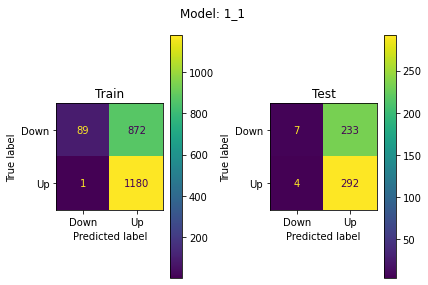

In [4]:
models = {'Log': LogisticRegression(max_iter = 2500), 'Knn': KNeighborsClassifier(), 
          'DT': DecisionTreeClassifier(random_state = 10), 'LDA': LinearDiscriminantAnalysis(),
          'Gaussian': GaussianNB(), 
           'LinearSVC': LinearSVC(max_iter = 2500, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

new_models = func.stacked_model(models)
stacked = new_models['Stacked']
stacked.n_jobs = -1
stacked.fit(x_train, y_train)
print(f'Train Accuracy: {stacked.score(x_train, y_train)}')
print(f'Test Accuracy: {stacked.score(x_test, y_test)}')

fig, ax = plt.subplots(1,2)
plt.suptitle(f'Model: {model_num}')
plot_confusion_matrix(stacked, x_train, y_train, ax = ax[0], display_labels = ['Down', 'Up']) 
plot_confusion_matrix(stacked, x_test, y_test, ax = ax[1], display_labels = ['Down', 'Up']) 
ax[0].set_title('Train')
ax[1].set_title('Test')
plt.tight_layout() 
plt.savefig(f'Images/Sklearn/CM_{model_num}.png')

In [5]:
#getting results and model
result_dict = func.test_models(x_train, y_train, new_models, n_jobs = 14)

Evaluating STACKED: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [1:28:30<00:00, 442.52s/it]


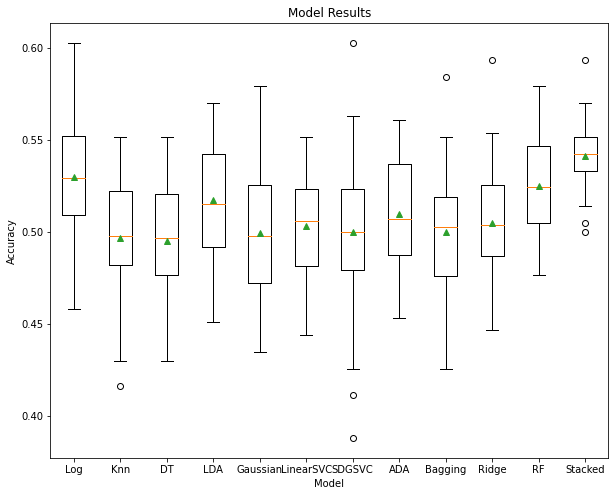

In [6]:
func.plot_model_results(result_dict, filepath = f'Images/Sklearn/ACC_{model_num}.png')

In [ ]:
assert False

### Model 2 

In [ ]:
#CHANGE 
model_num = '1_2'
max_feat = 10000 
min_df = 20
max_df = 1.0 
ngram = (1,2)
pre_type = 'stem'
vect_type = 'tfidf'

new_df, x_train, x_test, y_train, y_test, preprocessing_dict = process.preprocess_tts(df, pre_type = pre_type, ngram = ngram, 
                                                                              max_features = max_feat, 
                                                                             min_df = min_df, max_df =max_df, 
                                                                              vect_type = vect_type)
print(x_train.shape)

In [ ]:
models = {'Log': LogisticRegression(max_iter = 2500), 'Knn': KNeighborsClassifier(), 
          'DT': DecisionTreeClassifier(random_state = 10), 'LDA': LinearDiscriminantAnalysis(),
          'Gaussian': GaussianNB(), 
           'LinearSVC': LinearSVC(max_iter = 2500, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

new_models = func.stacked_model(models)
stacked = new_models['Stacked']
stacked.n_jobs = -1
stacked.fit(x_train, y_train)
print(f'Train Accuracy: {stacked.score(x_train, y_train)}')
print(f'Test Accuracy: {stacked.score(x_test, y_test)}')

fig, ax = plt.subplots(1,2)
plt.suptitle(f'Model: {model_num}')
plot_confusion_matrix(stacked, x_train, y_train, ax = ax[0], display_labels = ['Down', 'Up']) 
plot_confusion_matrix(stacked, x_test, y_test, ax = ax[1], display_labels = ['Down', 'Up']) 
ax[0].set_title('Train')
ax[1].set_title('Test')
plt.tight_layout() 
plt.savefig(f'Images/Sklearn/CM_{model_num}.png')

In [ ]:
# getting results and model
result_dict = func.test_models(x_train, y_train, new_models, n_jobs = 5)

In [ ]:
func.plot_model_results(result_dict, filepath = f'Images/Sklearn/ACC_{model_num}.png')

In [ ]:
assert False

#here

### Model 3

In [ ]:
model_num = '3_1'
max_feat = 5000 
min_df = 2
max_df = 1.0 
ngram = (1,2)
pre_type = 'lemmet'

new_df, x_train, x_test, y_train, y_test, preprocessing_dict = process.preprocess_tts(df, pre_type = pre_type, 
                                                                      ngram = ngram,  max_features = max_feat, 
                                                                             min_df = min_df, max_df = max_df)

In [ ]:
models = {'Log': LogisticRegression(max_iter = 2500), 'Knn': KNeighborsClassifier(), 
          'DT': DecisionTreeClassifier(random_state = 10), 'LDA': LinearDiscriminantAnalysis(),
          'Gaussian': GaussianNB(), 
           'LinearSVC': LinearSVC(max_iter = 2500, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

new_models = func.stacked_model(models)
stacked = new_models['Stacked']
stacked.n_jobs = -1
stacked.fit(x_train, y_train)
print(f'Train Accuracy: {stacked.score(x_train, y_train)}')
print(f'Test Accuracy: {stacked.score(x_test, y_test)}')

fig, ax = plt.subplots(1,2)
plt.suptitle(f'Model: {model_num}')
plot_confusion_matrix(stacked, x_train, y_train, ax = ax[0], display_labels = ['Down', 'Up']) 
plot_confusion_matrix(stacked, x_test, y_test, ax = ax[1], display_labels = ['Down', 'Up']) 
ax[0].set_title('Train')
ax[1].set_title('Test')
plt.tight_layout() 
plt.savefig(f'Images/Sklearn/CM_{model_num}.png')

In [ ]:
# getting results and model
result_dict = func.test_models(x_train, y_train, new_models, n_jobs = 13)

In [ ]:
func.plot_model_results(result_dict, filepath = f'Images/Sklearn/ACC_{model_num}.png')

In [ ]:
assert False